# Matched Control Subjects Analysis

Dataset gathered from control subjects, which were all healthy adults of a similar age range to patients. **TODO - ADD DESCRIPTION FOR MATCHED CONTROL SUBJECTS**

<img src="images/ddm_desc.jpeg" width="600">

Here, we use the `hddm` (Python) library$^1$ to model language-based decision making based on response-time & accuracy data from a binary forced-choice decision task. During each trial, subjects were presented with a digital image of an item (visual stimulus) and a verbal description (auditory stimulus). At the end of each trial, subjects were asked to indicate whether the two types of stimuli agreed (i.e. visual and auditory stimulus pointed to the same object) or were different (i.e. non-matching sound and image). Auditory and visual stimuli pairs fell under four distinct categories, as summarised below:  
- Condition 1 (**SS**): Same stimuli (see cat / hear cat)
- Condition 2 (**CP**): Phonologically congruent (see cat / hear hat)
- Condition 3 (**CS**): Semantically congruent (see cat / hear dog)
- Condition 4 (**US**): Unrelated stimuli (see house / hear cat)

In [2]:
"""
Environment setup
"""
%matplotlib inline
%cd ~/Programming/projects/language_decision/
import warnings; warnings.filterwarnings('ignore')
import hddm
import numpy as np
import matplotlib.pyplot as plt

from utils import model_tools

/Users/celefthe/Programming/projects/language_decision


In [3]:
"""
Plot Drift Diffusion Model for controls
"""

controls = hddm.load_csv('data/controls_clean.csv')

# Test if stimulus type affects drift rate
model = hddm.HDDM(controls, depends_on={'v': 'stim'})
model.find_starting_values()
model.sample(9000, burn=200)

 [-----------------100%-----------------] 9000 of 9000 complete in 142.8 sec

## Convergence Checks

Before carrying on with analysing the output of the model, we need to check that the markov chains have properly converged. There's a number of ways to do this, which the authors of the `hddm` library recommend$^1$. We'll begin by visually inspecting the MCMC posterior plots. 

Plotting a
Plotting a_std
Plotting v(CP)
Plotting v(CS)
Plotting v(SS)
Plotting v(US)
Plotting v_std
Plotting t
Plotting t_std


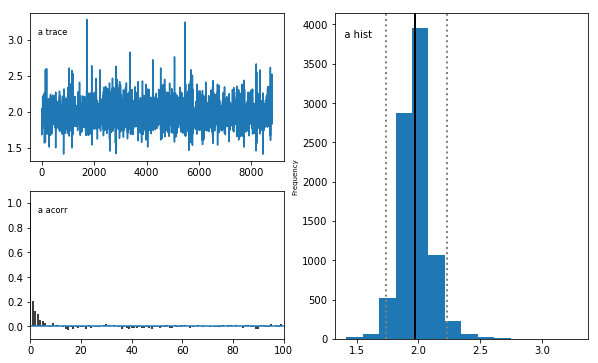

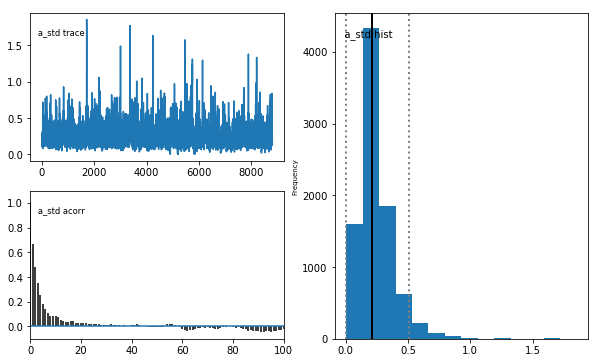

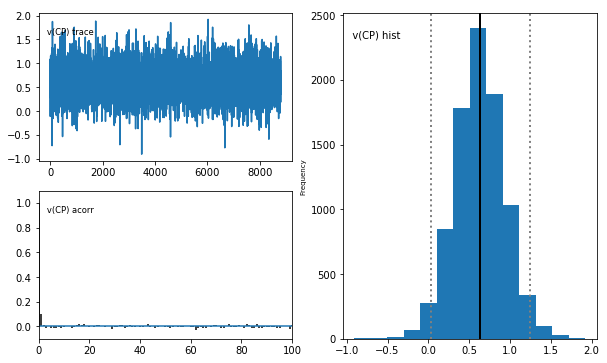

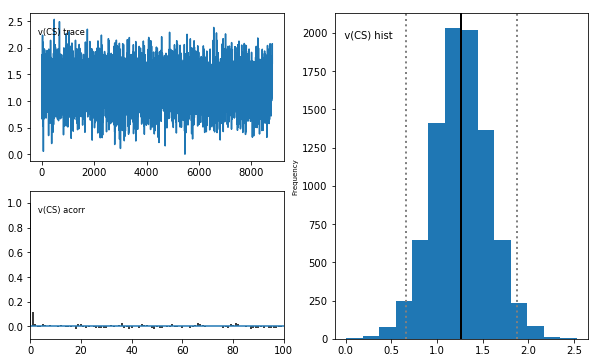

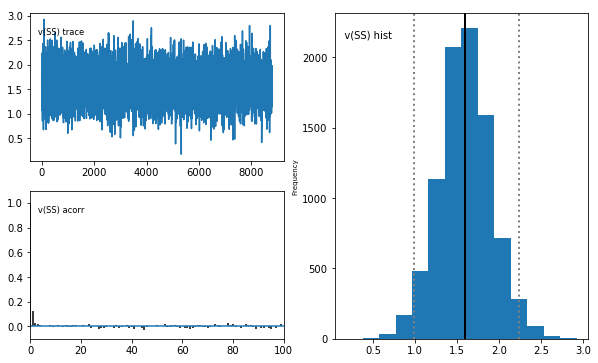

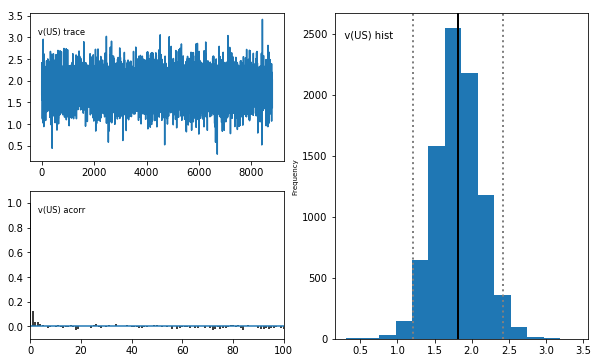

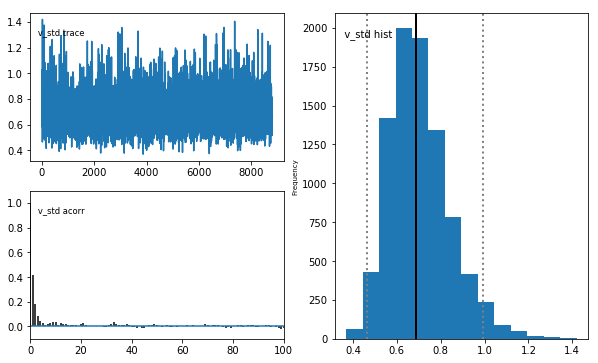

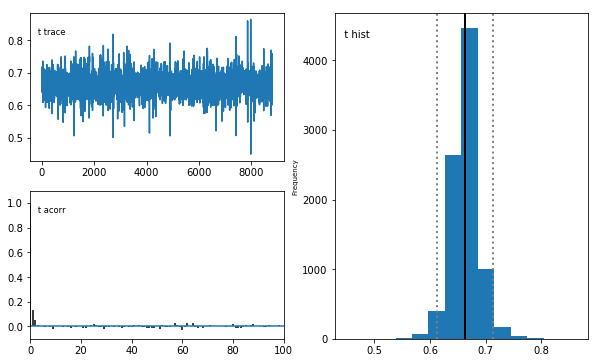

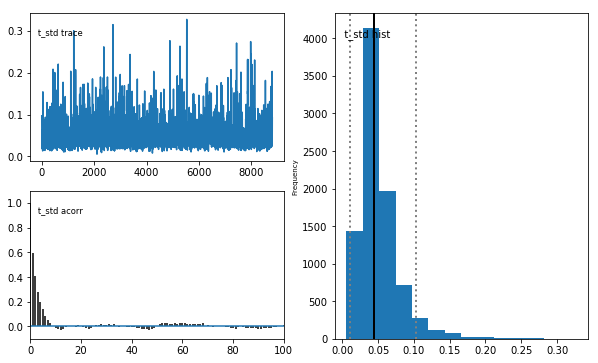

In [5]:
model.plot_posteriors()

In [8]:
models = []
for i in range(5):
    m = hddm.HDDM(controls, depends_on={'v': 'stim'})
    m.find_starting_values()
    m.sample(6000, burn=20)
    models.append(m)
    
model_tools.check_convergence(models)

 [-----------------100%-----------------] 6000 of 6000 complete in 109.4 sec
No convergence problems detected!


True

## Drift Rate Analysis

Here, we examine whether the type of stimulus significantly affects the drift rate of the decision-making process.

In [4]:
model_stats = model.gen_stats()
print("Threshold (a) Mean: " + str(model_stats['mean']['a']) + " (std: " + str(model_stats['std']['a']) + ")")
print("Non-Decision (t) Mean: " + str(model_stats['mean']['t']) + " (std: " + str(model_stats['std']['t']) + ")")
print("SS Mean Drift Rate: " + str(model_stats['mean']['v(SS)']) + " (std: " + str(model_stats['std']['v(SS)']) + ")")
print("CP Mean Drift Rate: " + str(model_stats['mean']['v(CP)']) + " (std: " + str(model_stats['std']['v(CP)']) + ")")
print("CS Mean Drift Rate: " + str(model_stats['mean']['v(CS)']) + " (std: " + str(model_stats['std']['v(CS)']) + ")")
print("US Mean Drift Rate: " + str(model_stats['mean']['v(US)']) + " (std: " + str(model_stats['std']['v(US)']) + ")")

Threshold (a) Mean: 1.97633033608 (std: 0.121448405402)
Non-Decision (t) Mean: 0.663903128002 (std: 0.0235693258853)
SS Mean Drift Rate: 1.59523116649 (std: 0.305978313954)
CP Mean Drift Rate: 0.628984047441 (std: 0.307827404823)
CS Mean Drift Rate: 1.25676332751 (std: 0.310198544393)
US Mean Drift Rate: 1.8199029135 (std: 0.310971540898)


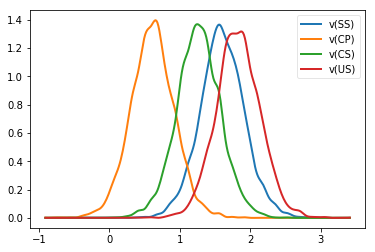

In [10]:
v_SS, v_CP, v_CS, v_US = model.nodes_db.node[['v(SS)', 'v(CP)', 'v(CS)', 'v(US)']]

hddm.analyze.plot_posterior_nodes([v_SS, v_CP, v_CS, v_US])

In [12]:
print('P(SS > US) = ' + str((v_SS.trace() > v_US.trace()).mean()))
print('P(CP > SS) = ' + str((v_CP.trace() > v_SS.trace()).mean()))
print('P(CS > SS) = ' + str((v_CS.trace() > v_SS.trace()).mean()))
print('P(CP > CS) = ' + str((v_CP.trace() > v_CS.trace()).mean()))
print('P(CP > US) = ' + str((v_CP.trace() > v_US.trace()).mean()))
print('P(CS > US) = ' + str((v_CS.trace() > v_US.trace()).mean()))

P(SS > US) = 0.298295454545
P(CP > SS) = 0.0156818181818
P(CS > SS) = 0.214659090909
P(CP > CS) = 0.0671590909091
P(CP > US) = 0.00397727272727
P(CS > US) = 0.0972727272727


- The drift rate for **CP** is significantly lower than both **SS** and **US**; no significant difference detected for **CS**  
- No other statistical significance detected at $p <0.05$

### Reaction Time & Accuracy 

Below are the reaction time and accuracy metrics of our dataset

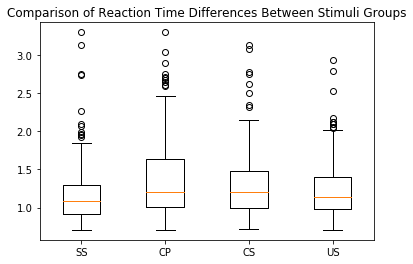

In [14]:
us = controls.loc[controls['stim'] == 'US']
ss = controls.loc[controls['stim'] == 'SS']
cp = controls.loc[controls['stim'] == 'CP']
cs = controls.loc[controls['stim'] == 'CS']

plt.boxplot([ss.rt.values, cp.rt.values, cs.rt.values, us.rt.values], 
            labels=('SS', 'CP', 'CS', 'US'),)
plt.title('Comparison of Reaction Time Differences Between Stimuli Groups')
plt.show()

In [15]:
ss_accuracy = (len([x for x in ss.response.values if x >= 1]) / len(ss.response.values)) * 100 
cp_accuracy = (len([x for x in cp.response.values if x >= 1]) / len(cp.response.values)) * 100
cs_accuracy = (len([x for x in cs.response.values if x >= 1]) / len(cs.response.values)) * 100
us_accuracy = (len([x for x in us.response.values if x >= 1]) / len(us.response.values)) * 100

print("SS Accuracy: " + str(ss_accuracy) + "%")
print("CP Accuracy: " + str(cp_accuracy) + "%")
print("CS Accuracy: " + str(cs_accuracy) + "%")
print("US Accuracy: " + str(us_accuracy) + "%")

SS Accuracy: 90.3954802259887%
CP Accuracy: 71.42857142857143%
CS Accuracy: 90.22988505747126%
US Accuracy: 97.14285714285714%


<Container object of 4 artists>

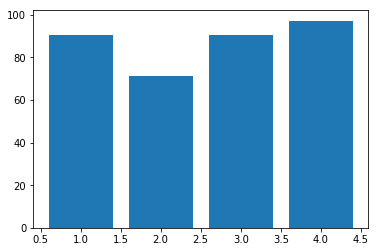

In [16]:
plt.bar([1,2,3,4], 
        [ss_accuracy, cp_accuracy, cs_accuracy, us_accuracy])

## Threshold Analysis

*Threshold* (or *t*) describes the relative difference in the distance between the upper and lower response boundaries of the DDM.

We explore whether stimulus type affects threshold

In [5]:
model_threshold = hddm.HDDM(controls, depends_on={'v': 'stim', 'a': 'stim'}, bias=True)
model_threshold.find_starting_values()
model_threshold.sample(9000, burn=200)

 [-----------------100%-----------------] 9000 of 9000 complete in 253.9 sec

In [21]:
models_threshold = []
for i in range(5):
    m = hddm.HDDM(controls, depends_on={'v': 'stim', 'z': 'stim'}, bias=True)
    m.find_starting_values()
    m.sample(6000, burn=20)
    models_threshold.append(m)
    
model_tools.check_convergence(models_threshold)

 [-----------------100%-----------------] 6000 of 6000 complete in 141.6 secConvergence error at z_std


False

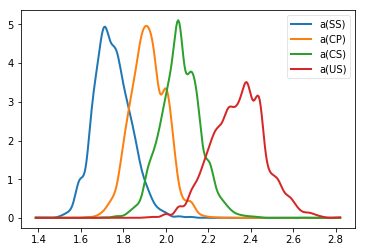

In [6]:
a_SS, a_CP, a_CS, a_US = model_threshold.nodes_db.node[['a(SS)', 'a(CP)', 'a(CS)', 'a(US)']]

hddm.analyze.plot_posterior_nodes([a_SS, a_CP, a_CS, a_US])

In [7]:
print('P(SS > US) = ' + str((a_SS.trace() > a_US.trace()).mean()))
print('P(CP > SS) = ' + str((a_CP.trace() > a_SS.trace()).mean()))
print('P(CS > SS) = ' + str((a_CS.trace() > a_SS.trace()).mean()))
print('P(CP > CS) = ' + str((a_CP.trace() > a_CS.trace()).mean()))
print('P(CS > US) = ' + str((a_CS.trace() > a_US.trace()).mean()))

P(SS > US) = 0.000113636363636
P(CP > SS) = 0.926477272727
P(CS > SS) = 0.99375
P(CP > CS) = 0.0910227272727
P(CS > US) = 0.0331818181818
